## MOVIE GENRE CLASSIFICATION

### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### READING THE DATASET

In [2]:
train_df = pd.read_csv("C:/Users/jasmi/OneDrive/Desktop/codsoft/Genre Classification Dataset/train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
test_df = pd.read_csv("C:/Users/jasmi/OneDrive/Desktop/codsoft/Genre Classification Dataset/test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
test_sol_df = pd.read_csv("C:/Users/jasmi/OneDrive/Desktop/codsoft/Genre Classification Dataset/test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')

### EXPLORATARY DATA ANALYSIS

In [3]:
train_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
train_df.tail()

,ID,TITLE,GENRE,DESCRIPTION
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [6]:
test_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [7]:
test_df.tail()

,ID,TITLE,GENRE,DESCRIPTION
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ...",NaN


In [8]:
test_sol_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [9]:
test_sol_df.tail()

,ID,TITLE,GENRE,DESCRIPTION
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."
54199,54200,Curitiba Zero Grau (2010),drama,"Curitiba is a city in movement, with rhythms ..."


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54200 non-null  int64  
 1   TITLE        54200 non-null  object 
 2   GENRE        54200 non-null  object 
 3   DESCRIPTION  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
test_sol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [13]:
train_df.dtypes

ID              int64
TITLE          object
GENRE          object
DESCRIPTION    object
dtype: object

In [14]:
test_df.dtypes

ID               int64
TITLE           object
GENRE           object
DESCRIPTION    float64
dtype: object

In [15]:
test_sol_df.dtypes

ID              int64
TITLE          object
GENRE          object
DESCRIPTION    object
dtype: object

In [16]:
train_df.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [17]:
test_df.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [18]:
test_sol_df.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [19]:
train_df.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [20]:
test_df.describe()

,ID,DESCRIPTION
count,54200.000000,0.0
mean,27100.500000,NaN
std,15646.336632,NaN
min,1.000000,NaN
25%,13550.750000,NaN
50%,27100.500000,NaN
75%,40650.250000,NaN
max,54200.000000,NaN


In [21]:
test_sol_df.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [22]:
train_df.isnull()

,ID,TITLE,GENRE,DESCRIPTION
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
54209,False,False,False,False
54210,False,False,False,False
54211,False,False,False,False
54212,False,False,False,False


In [23]:
train_df.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [24]:
train_df['GENRE'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [25]:
train_df['GENRE'].duplicated()

0        False
1        False
2        False
3         True
4         True
         ...  
54209     True
54210     True
54211     True
54212     True
54213     True
Name: GENRE, Length: 54214, dtype: bool

### DATA VISUALIZATION

#### BAR CHART

C:\Users\jasmi\AppData\Local\Temp\ipykernel_22176\1894709172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='tab20c')


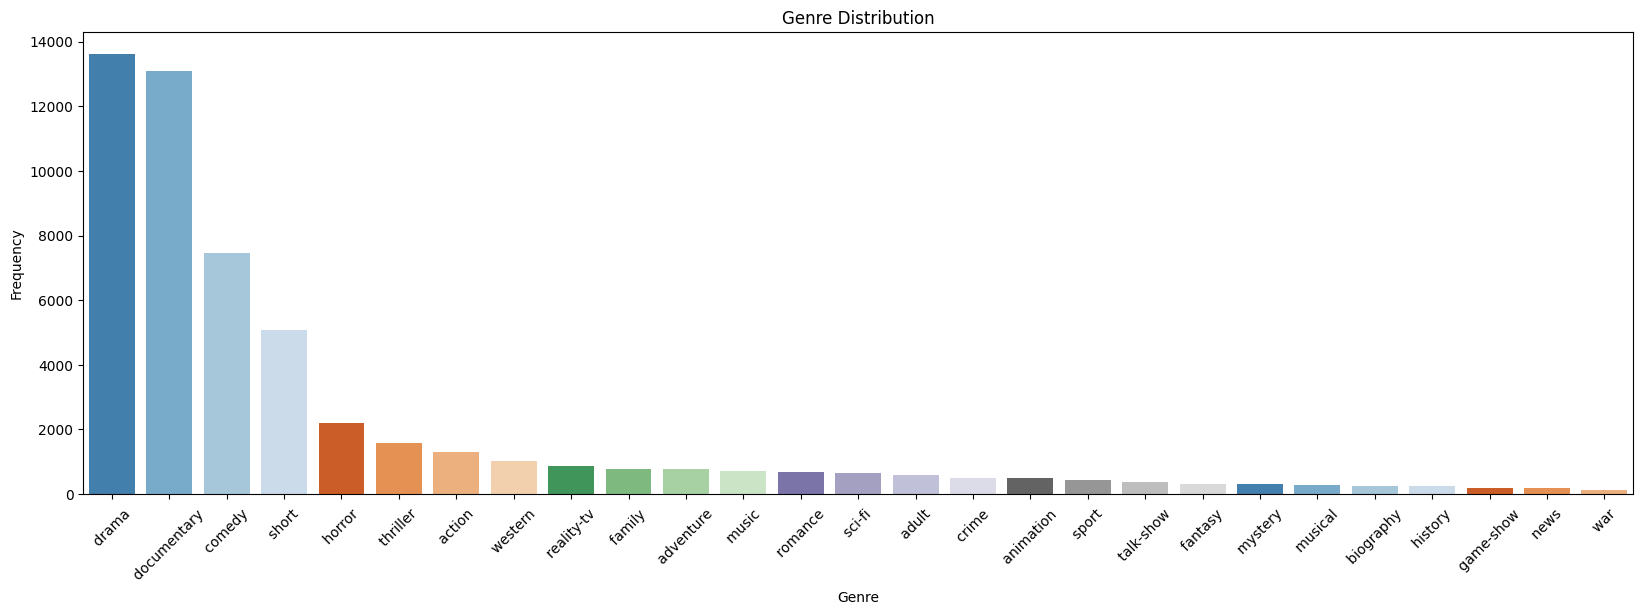

In [26]:
genre_counts = train_df['GENRE'].value_counts()
plt.figure(figsize=(20, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='tab20c')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\jasmi\AppData\Local\Temp\ipykernel_22176\3009803031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_genres_df, x='GENRE', order=top_genres, palette='viridis')


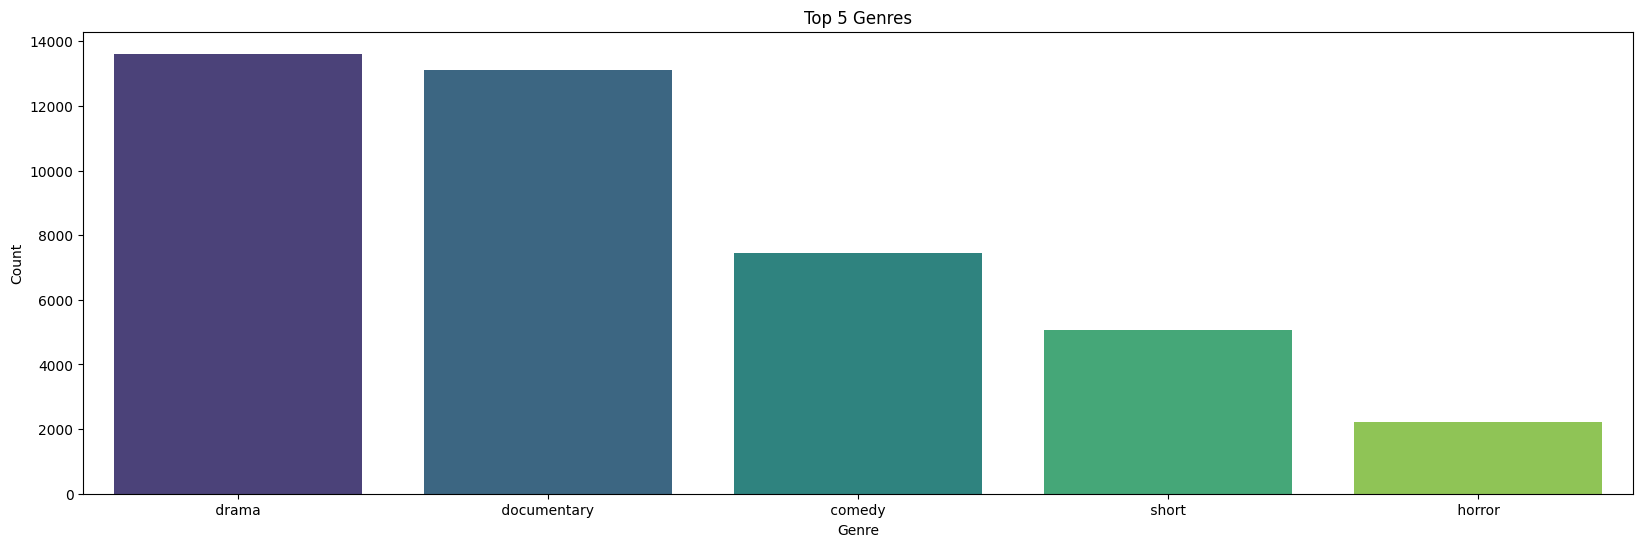

In [27]:
top_genres = train_df['GENRE'].value_counts().nlargest(5).index
top_genres_df = train_df[train_df['GENRE'].isin(top_genres)]
plt.figure(figsize=(20,6))
sns.countplot(data=top_genres_df, x='GENRE', order=top_genres, palette='viridis')
plt.title('Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

C:\Users\jasmi\AppData\Local\Temp\ipykernel_22176\2570761444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=least_genres_df, x='GENRE', order=least_genres, palette='Set1')


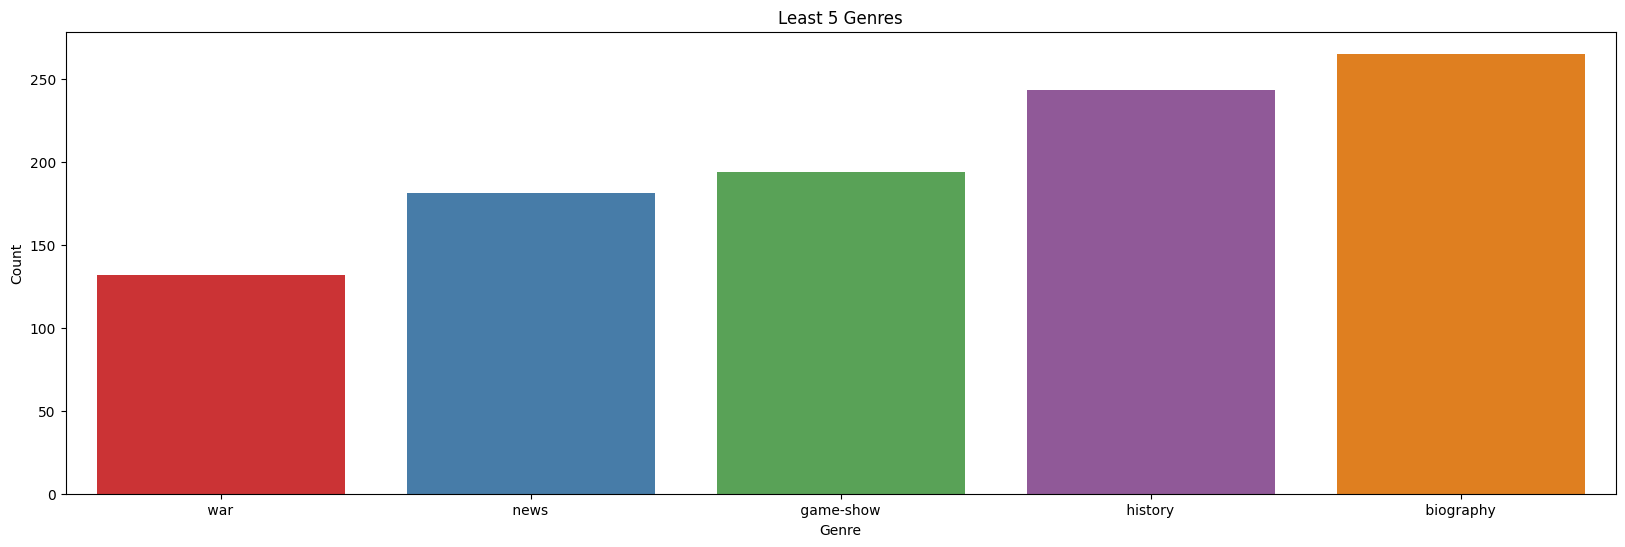

In [28]:
least_genres = train_df['GENRE'].value_counts().nsmallest(5).index
least_genres_df = train_df[train_df['GENRE'].isin(least_genres)]
plt.figure(figsize=(20 ,6))
sns.countplot(data=least_genres_df, x='GENRE', order=least_genres, palette='Set1')
plt.title('Least 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

#### BOX PLOT

C:\Users\jasmi\AppData\Local\Temp\ipykernel_22176\2549138510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df[train_df['GENRE'].isin(top_genres)], x='GENRE', y='ID', palette='Set2', order=top_genres)


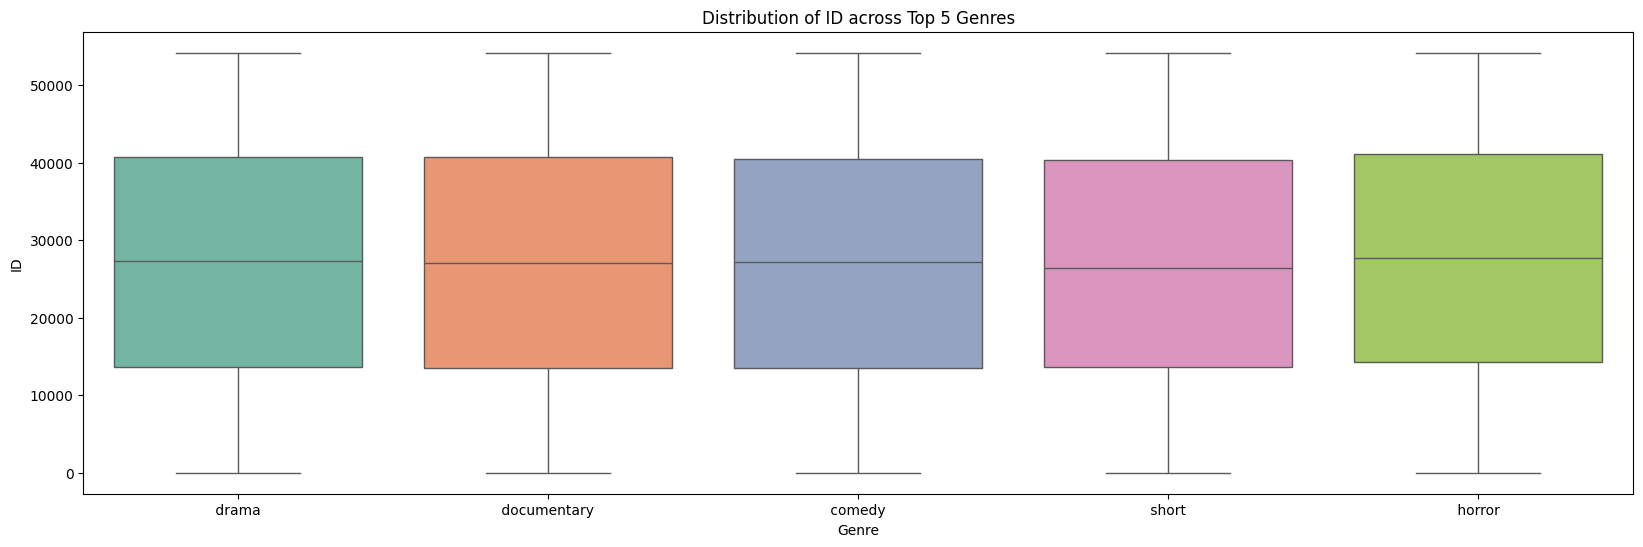

In [29]:
top_genres = train_df['GENRE'].value_counts().nlargest(5).index
plt.figure(figsize=(20, 6))
sns.boxplot(data=train_df[train_df['GENRE'].isin(top_genres)], x='GENRE', y='ID', palette='Set2', order=top_genres)
plt.title('Distribution of ID across Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('ID')
plt.show()

#### VIOLIN PLOT

C:\Users\jasmi\AppData\Local\Temp\ipykernel_22176\4027738403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df[train_df['GENRE'].isin(top_genres)], x='GENRE', y='ID', palette='coolwarm', order=top_genres)


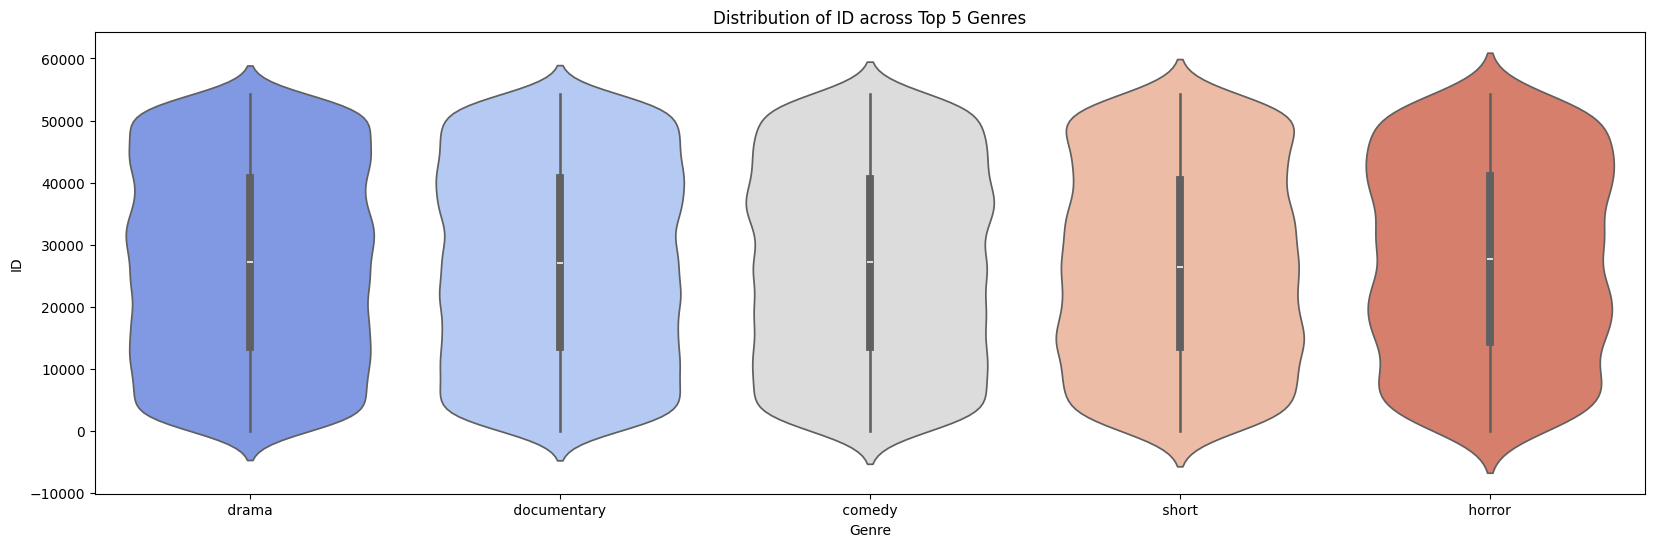

In [30]:
top_genres = train_df['GENRE'].value_counts().nlargest(5).index
plt.figure(figsize=(20, 6))
sns.violinplot(data=train_df[train_df['GENRE'].isin(top_genres)], x='GENRE', y='ID', palette='coolwarm', order=top_genres)
plt.title('Distribution of ID across Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('ID')
plt.show()

#### PIE CHART

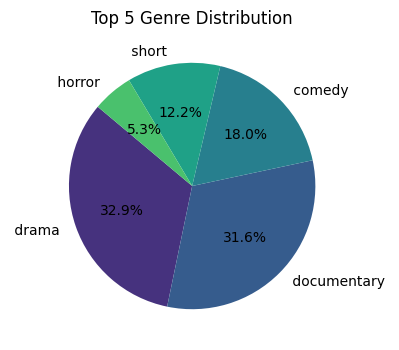

In [31]:
genre_counts = train_df['GENRE'].value_counts().nlargest(5)
colors = sns.color_palette('viridis')[0:len(genre_counts)]
plt.figure(figsize=(6,4))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Genre Distribution')
plt.show()

### ENCODING AND TRANSFORMING DATA

In [32]:
tf = TfidfVectorizer(max_features=1000)

In [33]:
x_tr = tf.fit_transform(train_df['DESCRIPTION'])

In [34]:
LE = LabelEncoder()

In [35]:
y_tr = LE.fit_transform(train_df['GENRE'])
y_ts = LE.fit_transform(test_sol_df['GENRE'])

### SPLITTING DATA FOR TRAIN AND TEST

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_tr , y_tr , test_size=0.2, random_state=42)

### BUILDING MODELS

### LOGISTIC REGRESSION

In [37]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
lr_pred = lr_model.predict(X_test)

In [40]:
y_test_genre = LE.inverse_transform(y_test)
y_pred_genre = LE.inverse_transform(lr_pred)

#### CLASSIFICATION REPORT

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_genre, y_pred_genre, zero_division=1))

               precision    recall  f1-score   support

      action        0.38      0.17      0.24       263
       adult        0.65      0.18      0.28       112
   adventure        0.36      0.09      0.14       139
   animation        0.45      0.05      0.09       104
   biography        1.00      0.00      0.00        61
      comedy        0.47      0.52      0.49      1443
       crime        0.25      0.03      0.05       107
 documentary        0.65      0.84      0.74      2659
       drama        0.53      0.75      0.62      2697
      family        0.35      0.09      0.14       150
     fantasy        1.00      0.00      0.00        74
   game-show        0.85      0.28      0.42        40
     history        1.00      0.00      0.00        45
      horror        0.55      0.50      0.52       431
       music        0.57      0.42      0.48       144
     musical        1.00      0.04      0.08        50
     mystery        0.33      0.02      0.03        56
        n

### SUPPORT VECTOR MACHINE (SVM)

In [42]:
sv_model = LinearSVC()
sv_model.fit(X_train, y_train)

C:\Users\jasmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [43]:
sv_pred = sv_model.predict(X_test)

In [44]:
y_test_genre = LE.inverse_transform(y_test)
y_pred_genre = LE.inverse_transform(sv_pred)

#### CLASSIFICATION REPORT

In [45]:
print(classification_report(y_test_genre, y_pred_genre, zero_division=1))

               precision    recall  f1-score   support

      action        0.32      0.16      0.21       263
       adult        0.55      0.31      0.40       112
   adventure        0.30      0.08      0.12       139
   animation        0.26      0.07      0.11       104
   biography        1.00      0.00      0.00        61
      comedy        0.47      0.49      0.48      1443
       crime        0.27      0.06      0.09       107
 documentary        0.65      0.85      0.74      2659
       drama        0.54      0.73      0.62      2697
      family        0.33      0.10      0.15       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.64      0.45      0.53        40
     history        1.00      0.00      0.00        45
      horror        0.50      0.55      0.52       431
       music        0.52      0.47      0.49       144
     musical        0.33      0.06      0.10        50
     mystery        0.33      0.07      0.12        56
        n

### NAIVE BAYES

In [46]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [47]:
nb_pred = nb_model.predict(X_test)

In [48]:
y_test_genre = LE.inverse_transform(y_test)
y_pred_genre = LE.inverse_transform(nb_pred)

#### CLASSIFICATION REPORT

In [49]:
print(classification_report(y_test_genre, y_pred_genre, zero_division=1))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        1.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        1.00      0.00      0.00       104
   biography        1.00      0.00      0.00        61
      comedy        0.50      0.26      0.34      1443
       crime        1.00      0.00      0.00       107
 documentary        0.53      0.89      0.66      2659
       drama        0.41      0.83      0.55      2697
      family        0.00      0.00      0.00       150
     fantasy        1.00      0.00      0.00        74
   game-show        1.00      0.05      0.10        40
     history        1.00      0.00      0.00        45
      horror        0.80      0.09      0.16       431
       music        0.75      0.04      0.08       144
     musical        1.00      0.00      0.00        50
     mystery        1.00      0.00      0.00        56
        n

### ACCURACY

In [50]:
lr_accuracy = accuracy_score(y_test, lr_pred)
sv_accuracy = accuracy_score(y_test, sv_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

In [51]:
print("Logistic Regression Accuracy:", lr_accuracy)
print("SVM Accuracy:", sv_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Logistic Regression Accuracy: 0.551415659872729
SVM Accuracy: 0.5481877709121092
Naive Bayes Accuracy: 0.4731162962279812


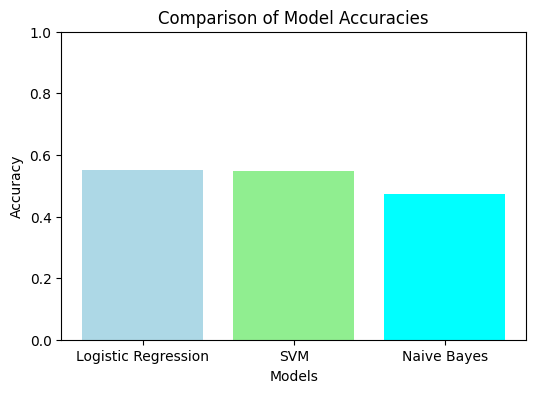

In [52]:
accuracies = [lr_accuracy, sv_accuracy, nb_accuracy]
models = ['Logistic Regression', 'SVM', 'Naive Bayes']
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['lightblue', 'lightgreen', 'cyan'])
plt.ylim(0, 1) 
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

### PREDICTION

#### Since the Logistic Regression model has demonstrated the highest accuracy, we will use this model for making predictions.

In [54]:
def predict_movie(description):
    vec = tf.transform([description])
    pred = lr_model.predict(vec)
    return LE.inverse_transform(pred)[0]

user_input = input("Enter a movie description: ")
predicted_genre = predict_movie(user_input)
print(f"The predicted genre for the movie '{user_input}' is: {predicted_genre}")

The predicted genre for the movie 'In a world where memories can be bought and sold, memory dealer Maya uncovers a conspiracy hidden within her clients' memories, threatening humanity's future. Teaming up with Ethan, a former operative whose memories were erased, they race against time to uncover the truth and confront their own hidden pasts. Echoes of Tomorrow is a thrilling sci-fi journey through identity, betrayal, and the nature of reality' is:  short 
